# Nuclear Decay Example
## Predicting beyond the known data range : Linear Regression, Randon Forest and Physics Informed Neural Network (PINN) models
Model nuclear decay where a radioactive substance has half-life of 5 years. With initial 100 grams of substance , use PINN to predict decay to 15 years. Use training data from first order differential equation covering first 5 years of decay.

## 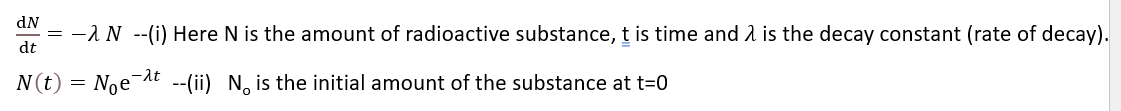

Linear Regression - Training MSE: 43.6618, Testing MSE: 36.2004
Random Forest - Training MSE: 1.3897, Testing MSE: 4.4727


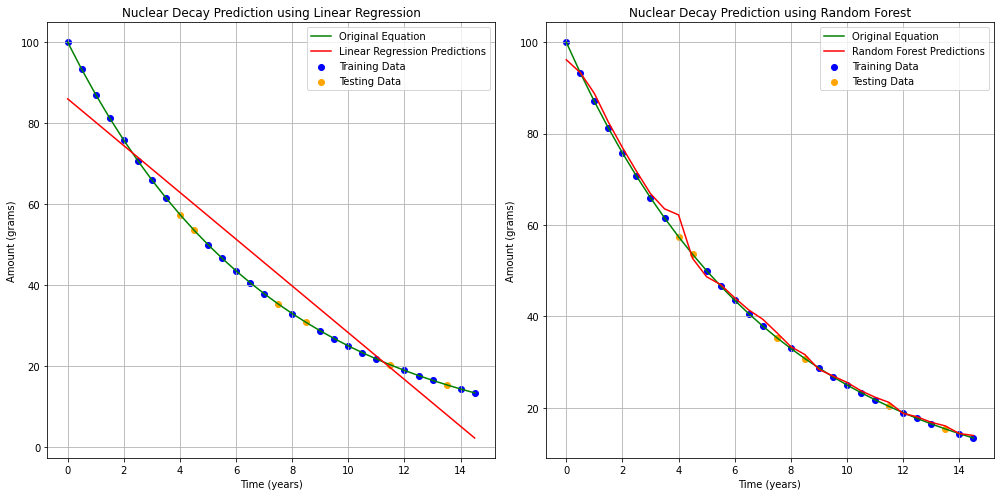

In [1]:
#Linear Regression and Random Forest models taking 20% data as training data from the full range
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define the parameters
initial_amount = 100  # Initial amount of the radioactive substance in grams
half_life = 5  # Half-life in years
decay_constant = np.log(2) / half_life  # Decay constant
t = np.arange(0, 15, 0.5)  # Time array from 0 to 15 years with steps of 0.5 years

# Define the function for the amount of substance over time
def decay(t, initial_amount, decay_constant):
    return initial_amount * np.exp(-decay_constant * t)

# Calculate the amount of substance at each time point
amount = decay(t, initial_amount, decay_constant)

# Split the data into training and testing sets (80% training, 20% testing)
t_train, t_test, amount_train, amount_test = train_test_split(t.reshape(-1, 1), amount.reshape(-1, 1), test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(t_train, amount_train)
amount_train_pred_lr = lr_model.predict(t_train)
amount_test_pred_lr = lr_model.predict(t_test)

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(t_train, amount_train.ravel())
amount_train_pred_rf = rf_model.predict(t_train)
amount_test_pred_rf = rf_model.predict(t_test)

# Calculate accuracy (mean squared error)
mse_train_lr = mean_squared_error(amount_train, amount_train_pred_lr)
mse_test_lr = mean_squared_error(amount_test, amount_test_pred_lr)
mse_train_rf = mean_squared_error(amount_train, amount_train_pred_rf)
mse_test_rf = mean_squared_error(amount_test, amount_test_pred_rf)

print(f"Linear Regression - Training MSE: {mse_train_lr:.4f}, Testing MSE: {mse_test_lr:.4f}")
print(f"Random Forest - Training MSE: {mse_train_rf:.4f}, Testing MSE: {mse_test_rf:.4f}")

# Plot the results
plt.figure(figsize=(14, 7))

# Plot Linear Regression results
plt.subplot(1, 2, 1)
plt.scatter(t_train, amount_train, color='blue', label='Training Data')
plt.scatter(t_test, amount_test, color='orange', label='Testing Data')
plt.plot(t, decay(t, initial_amount, decay_constant), color='green', label='Original Equation')
plt.plot(t, lr_model.predict(t.reshape(-1, 1)), color='red', label='Linear Regression Predictions')
plt.xlabel('Time (years)')
plt.ylabel('Amount (grams)')
plt.title('Nuclear Decay Prediction using Linear Regression')
plt.legend()
plt.grid(True)

# Plot Random Forest results
plt.subplot(1, 2, 2)
plt.scatter(t_train, amount_train, color='blue', label='Training Data')
plt.scatter(t_test, amount_test, color='orange', label='Testing Data')
plt.plot(t, decay(t, initial_amount, decay_constant), color='green', label='Original Equation')
plt.plot(t, rf_model.predict(t.reshape(-1, 1)), color='red', label='Random Forest Predictions')
plt.xlabel('Time (years)')
plt.ylabel('Amount (grams)')
plt.title('Nuclear Decay Prediction using Random Forest')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Linear Regression - Training MSE: 2.3049, Testing MSE: 1143.4094
Random Forest - Training MSE: 2.9095, Testing MSE: 725.9456


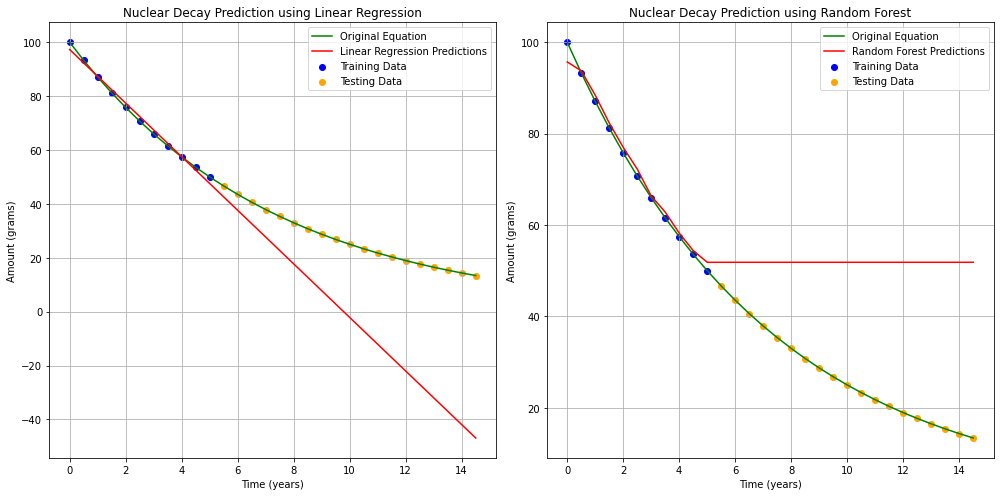

In [2]:
#Linear regression and Random Forest models taking only the first 5 years of decay data as training data and then predicting the future decay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the parameters
initial_amount = 100  # Initial amount of the radioactive substance in grams
half_life = 5  # Half-life in years
decay_constant = np.log(2) / half_life  # Decay constant
t = np.arange(0, 15, 0.5)  # Time array from 0 to 15 years with steps of 0.5 years

# Define the function for the amount of substance over time
def decay(t, initial_amount, decay_constant):
    return initial_amount * np.exp(-decay_constant * t)

# Calculate the amount of substance at each time point
amount = decay(t, initial_amount, decay_constant)

# Use only the first 5 years for training data
t_train = t[t <= 5].reshape(-1, 1)
amount_train = amount[t <= 5].reshape(-1, 1)

# Use the rest of the time range for testing data
t_test = t[t > 5].reshape(-1, 1)
amount_test = amount[t > 5].reshape(-1, 1)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(t_train, amount_train)
amount_train_pred_lr = lr_model.predict(t_train)
amount_test_pred_lr = lr_model.predict(t_test)

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(t_train, amount_train.ravel())
amount_train_pred_rf = rf_model.predict(t_train)
amount_test_pred_rf = rf_model.predict(t_test)

# Calculate accuracy (mean squared error)
mse_train_lr = mean_squared_error(amount_train, amount_train_pred_lr)
mse_test_lr = mean_squared_error(amount_test, amount_test_pred_lr)
mse_train_rf = mean_squared_error(amount_train, amount_train_pred_rf)
mse_test_rf = mean_squared_error(amount_test, amount_test_pred_rf)

print(f"Linear Regression - Training MSE: {mse_train_lr:.4f}, Testing MSE: {mse_test_lr:.4f}")
print(f"Random Forest - Training MSE: {mse_train_rf:.4f}, Testing MSE: {mse_test_rf:.4f}")

# Plot the results
plt.figure(figsize=(14, 7))

# Plot Linear Regression results
plt.subplot(1, 2, 1)
plt.scatter(t_train, amount_train, color='blue', label='Training Data')
plt.scatter(t_test, amount_test, color='orange', label='Testing Data')
plt.plot(t, decay(t, initial_amount, decay_constant), color='green', label='Original Equation')
plt.plot(t, lr_model.predict(t.reshape(-1, 1)), color='red', label='Linear Regression Predictions')
plt.xlabel('Time (years)')
plt.ylabel('Amount (grams)')
plt.title('Nuclear Decay Prediction using Linear Regression')
plt.legend()
plt.grid(True)

# Plot Random Forest results
plt.subplot(1, 2, 2)
plt.scatter(t_train, amount_train, color='blue', label='Training Data')
plt.scatter(t_test, amount_test, color='orange', label='Testing Data')
plt.plot(t, decay(t, initial_amount, decay_constant), color='green', label='Original Equation')
plt.plot(t, rf_model.predict(t.reshape(-1, 1)), color='red', label='Random Forest Predictions')
plt.xlabel('Time (years)')
plt.ylabel('Amount (grams)')
plt.title('Nuclear Decay Prediction using Random Forest')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 0, Loss: 2247.978759765625
Epoch 100, Loss: 1930.40185546875
Epoch 200, Loss: 1188.091552734375
Epoch 300, Loss: 1070.0755615234375
Epoch 400, Loss: 1053.5667724609375
Epoch 500, Loss: 1033.89990234375
Epoch 600, Loss: 1008.7943115234375
Epoch 700, Loss: 973.1035766601562
Epoch 800, Loss: 912.9945678710938
Epoch 900, Loss: 783.9393310546875
Epoch 1000, Loss: 493.5860290527344
Epoch 1100, Loss: 107.24642944335938
Epoch 1200, Loss: 19.8282470703125
Epoch 1300, Loss: 24.22334098815918
Epoch 1400, Loss: 19.61284828186035
Epoch 1500, Loss: 13.680033683776855
Epoch 1600, Loss: 7.049427032470703
Epoch 1700, Loss: 2.495746374130249
Epoch 1800, Loss: 2.2551727294921875
Epoch 1900, Loss: 1.4088821411132812
Epoch 2000, Loss: 2.5915584564208984
Epoch 2100, Loss: 2.559938669204712
Epoch 2200, Loss: 1.1674425601959229
Epoch 2300, Loss: 0.7667527198791504
Epoch 2400, Loss: 0.40873095393180847
Epoch 2500, Loss: 0.3646373152732849
Epoch 2600, Loss: 0.3796912133693695
Epoch 2700, Loss: 0.356844186

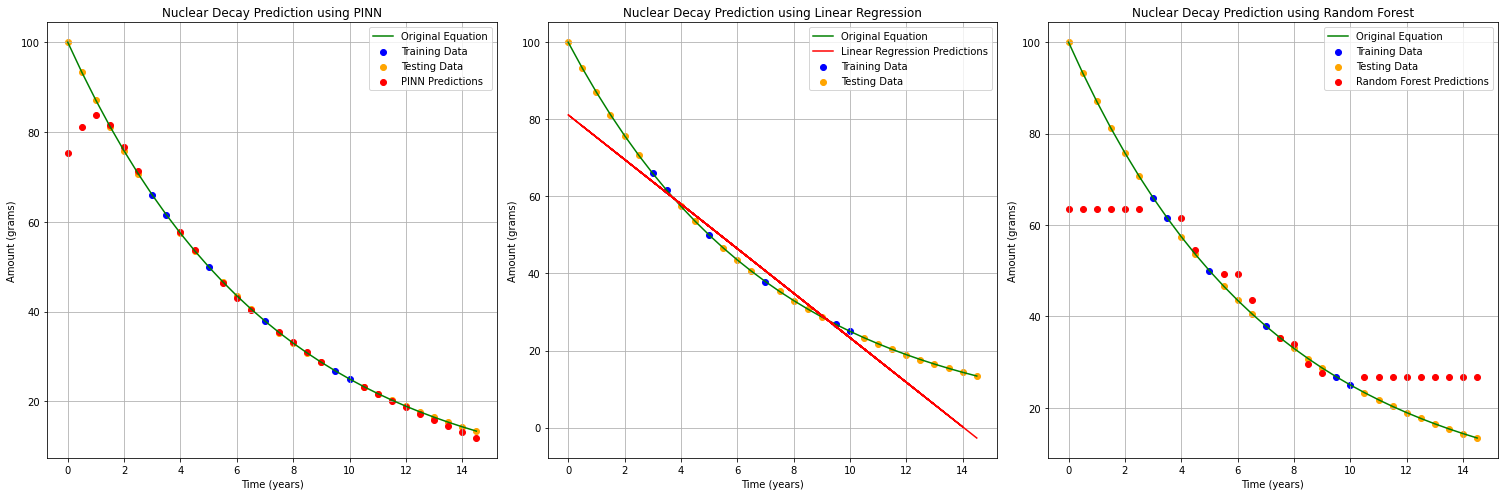

In [3]:
#randomly selected training data and LR, RF and PINN models
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define the parameters
initial_amount = 100  # Initial amount of the radioactive substance in grams
half_life = 5  # Half-life in years
decay_constant = np.log(2) / half_life  # Decay constant
t = np.arange(0, 15, 0.5)  # Time array from 0 to 15 years with steps of 0.5 years

# Define the function for the amount of substance over time
def decay(t, initial_amount, decay_constant):
    return initial_amount * np.exp(-decay_constant * t)

# Calculate the amount of substance at each time point
amount = decay(t, initial_amount, decay_constant)

# Split the data into training (20%) and testing (80%) sets randomly from the entire time range (0 to 15 years)
t_train, t_test, amount_train, amount_test = train_test_split(t.reshape(-1, 1), amount.reshape(-1, 1), test_size=0.8, random_state=42)

# Convert training data to tf.Tensor for PINN model
t_train_tf = tf.convert_to_tensor(t_train, dtype=tf.float32)
amount_train_tf = tf.convert_to_tensor(amount_train, dtype=tf.float32)

# Define the physics-informed neural network model
class PINN(Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense1 = Dense(100, activation='relu')
        self.dense2 = Dense(100, activation='relu')
        self.dense3 = Dense(100, activation='relu')
        self.dense4 = Dense(100, activation='relu')
        self.dropout = Dropout(0.2)
        self.dense5 = Dense(1, activation='linear')

    def call(self, t):
        x = self.dense1(t)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dropout(x)
        x = self.dense4(x)
        amount_pred = self.dense5(x)
        return amount_pred

    def loss(self, t, amount_true):
        with tf.GradientTape() as tape:
            tape.watch(t)
            amount_pred = self.call(t)
        d_amount_dt_pred = tape.gradient(amount_pred, t)
        physics_loss = tf.reduce_mean(tf.square(d_amount_dt_pred + decay_constant * amount_pred))
        data_loss = tf.reduce_mean(tf.square(amount_true - amount_pred))
        return physics_loss + data_loss

# Instantiate and compile the PINN model
pinn_model = PINN()
optimizer = Adam(learning_rate=0.0001)

# Training loop for PINN model
epochs = 5000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss_value = pinn_model.loss(t_train_tf, amount_train_tf)
    grads = tape.gradient(loss_value, pinn_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, pinn_model.trainable_variables))
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss_value.numpy()}")

# Make predictions on the training and testing sets for PINN model
amount_train_pred_pinn = pinn_model(t_train_tf).numpy()
amount_test_pred_pinn = pinn_model(tf.convert_to_tensor(t_test, dtype=tf.float32)).numpy()

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(t_train, amount_train)
amount_train_pred_lr = lr_model.predict(t_train)
amount_test_pred_lr = lr_model.predict(t_test)

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(t_train, amount_train.ravel())
amount_train_pred_rf = rf_model.predict(t_train)
amount_test_pred_rf = rf_model.predict(t_test)

# Calculate accuracy (mean squared error) for all models
mse_train_pinn = mean_squared_error(amount_train, amount_train_pred_pinn)
mse_test_pinn = mean_squared_error(amount_test, amount_test_pred_pinn)
mse_train_lr = mean_squared_error(amount_train, amount_train_pred_lr)
mse_test_lr = mean_squared_error(amount_test, amount_test_pred_lr)
mse_train_rf = mean_squared_error(amount_train, amount_train_pred_rf)
mse_test_rf = mean_squared_error(amount_test, amount_test_pred_rf)

print(f"PINN - Training MSE: {mse_train_pinn:.4f}, Testing MSE: {mse_test_pinn:.4f}")
print(f"Linear Regression - Training MSE: {mse_train_lr:.4f}, Testing MSE: {mse_test_lr:.4f}")
print(f"Random Forest - Training MSE: {mse_train_rf:.4f}, Testing MSE: {mse_test_rf:.4f}")

# Plot the results
plt.figure(figsize=(21, 7))

# Plot PINN results
plt.subplot(1, 3, 1)
plt.scatter(t_train, amount_train, color='blue', label='Training Data')
plt.scatter(t_test, amount_test, color='orange', label='Testing Data')
plt.plot(t, decay(t, initial_amount, decay_constant), color='green', label='Original Equation')
plt.scatter(t_test, amount_test_pred_pinn, color='red', label='PINN Predictions')
plt.xlabel('Time (years)')
plt.ylabel('Amount (grams)')
plt.title('Nuclear Decay Prediction using PINN')
plt.legend()
plt.grid(True)

# Plot Linear Regression results
plt.subplot(1, 3, 2)
plt.scatter(t_train, amount_train, color='blue', label='Training Data')
plt.scatter(t_test, amount_test, color='orange', label='Testing Data')
plt.plot(t, decay(t, initial_amount, decay_constant), color='green', label='Original Equation')
plt.plot(t_test.flatten(), amount_test_pred_lr.flatten(), color='red', label='Linear Regression Predictions')
plt.xlabel('Time (years)')
plt.ylabel('Amount (grams)')
plt.title('Nuclear Decay Prediction using Linear Regression')
plt.legend()
plt.grid(True)

# Plot Random Forest results
plt.subplot(1, 3, 3)
plt.scatter(t_train, amount_train, color='blue', label='Training Data')
plt.scatter(t_test, amount_test, color='orange', label='Testing Data')
plt.plot(t, decay(t, initial_amount, decay_constant), color='green', label='Original Equation')
plt.scatter(t_test.flatten(), amount_test_pred_rf.flatten(), color='red', label='Random Forest Predictions')
plt.xlabel('Time (years)')
plt.ylabel('Amount (grams)')
plt.title('Nuclear Decay Prediction using Random Forest')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
